In [12]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + TOPIC AND SENTIMENT INTENSITY + ECONOMIC INDEX - DATA COMPOSITION 1 (70-15-15).csv')
df.head(5)

,Month,Tourist Arrival,Number of Posts,Number of Comments,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,CCI,PMI,REERI,Class
0,01/01/2008,399556,403,3049,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,98.4,53.3,109,Train
1,01/02/2008,411032,357,3211,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,90.8,53.0,108,Train
2,01/03/2008,414332,344,3153,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,89.5,53.4,106,Train
3,01/04/2008,395900,338,3184,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,82.6,56.4,106,Train
4,01/05/2008,366387,369,2964,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,79.8,57.2,106,Train


In [14]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [15]:
X=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [16]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(134, 20)
(26, 20)
(26, 20)


In [17]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [18]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

X_train = train[predictors_train].values
y_train = train[target_column_train].values

print(X_train.shape)
print(y_train.shape)

(134, 18)
(134, 1)


In [19]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

X_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(X_validation.shape)
print(y_validation.shape)

(26, 18)
(26, 1)


In [20]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

X_test = test[predictors_test].values
y_test = test[target_column_test].values

print(X_test.shape)
print(y_test.shape)

(26, 18)
(26, 1)


In [21]:
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics
from scipy import stats
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [22]:
svr_rbf = SVR(kernel='sigmoid', C=10, epsilon=0.05)
svr_rbf.fit(X_train, y_train) 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, kernel='sigmoid')

In [23]:
params = {'C':[0.1, 1, 10, 100, 1000],
          'epsilon':[1, 0.1, 0.001, 0.0001, 0.00001]}

In [24]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)


In [25]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVR(C=10, epsilon=0.05, kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [1, 0.1, 0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='r2', verbose=1)

In [26]:
grid.best_estimator_

SVR(C=0.1, epsilon=1, kernel='sigmoid')

In [27]:
svr_best=SVR(kernel='sigmoid', C=0.1, epsilon=1)
svr_best.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, epsilon=1, kernel='sigmoid')

In [28]:
svr_best.score(X_validation,y_validation)


-0.019244143580741113

In [29]:
y_pred=svr_best.predict(X_test)
print(y_pred)

[610239.49473485 610239.49261675 610239.49481199 610239.47692346
 610239.49734311 610239.5047703  610239.48316926 610239.48412773
 610239.54333975 610239.61723361 610239.79523597 610240.10299453
 610240.21998271 610240.12001195 610240.27524633 610240.36421931
 610240.37876296 610240.54809506 610240.57818981 610240.50216791
 610240.61021432 610240.6001829  610240.63224357 610240.54607415
 610240.44794036 610240.38317021]


In [30]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 461580.4028196951


In [31]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 418017.9134544627


In [32]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 6.342171590039602e+20


In [33]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 2983.2901633267993


In [34]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_2604/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


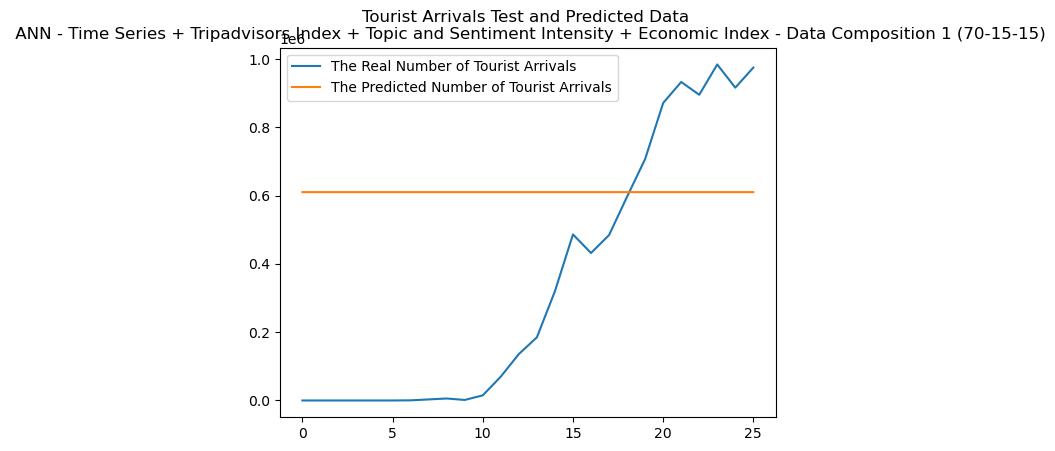

In [35]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n ANN - Time Series + Tripadvisors Index + Topic and Sentiment Intensity + Economic Index - Data Composition 1 (70-15-15)")
plt.legend()
plt.show()